- CV2 version

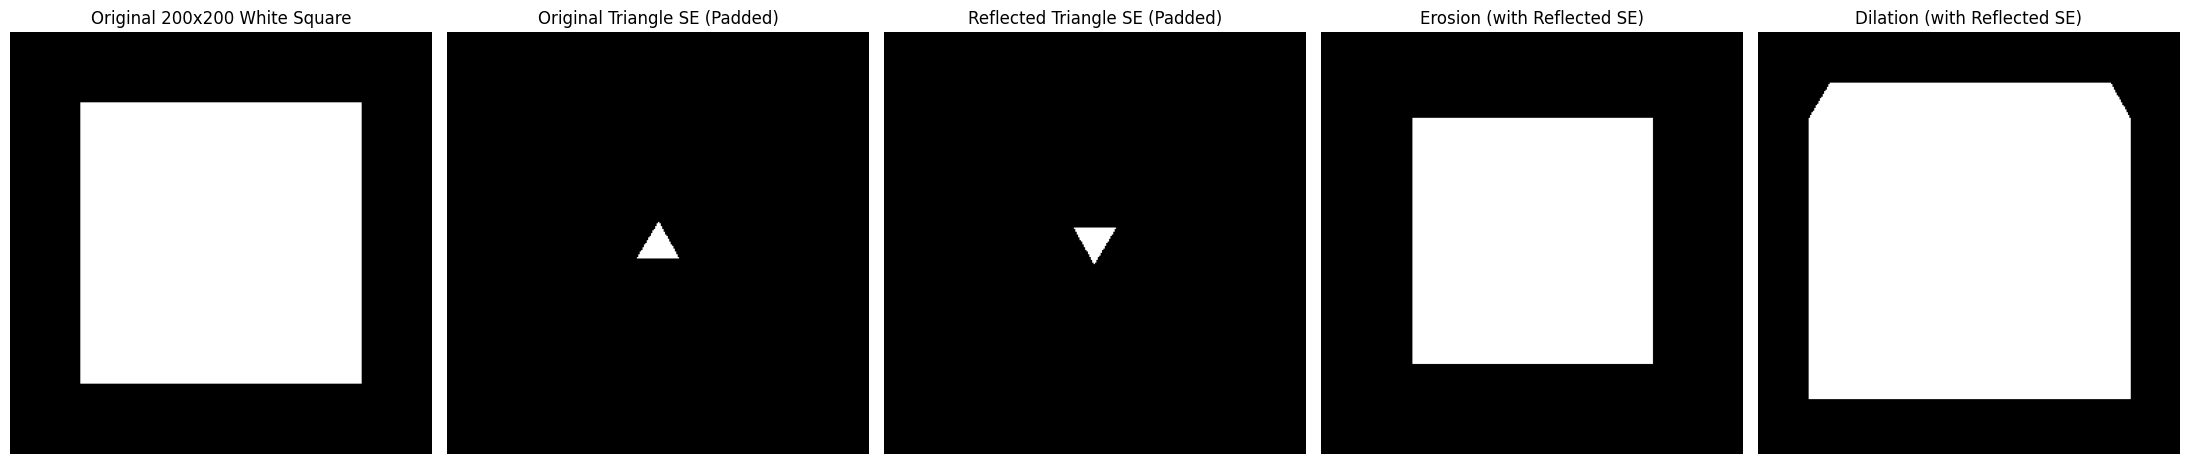

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
canvas_size = 300
square_size = 200
triangle_size = 30

# 建立影像（中央白色正方形）
image = np.zeros((canvas_size, canvas_size), dtype=np.uint8)
start = (canvas_size - square_size) // 2
end = start + square_size
image[start:end, start:end] = 255

# 建立正三角形 SE（原始大小）
se_canvas = np.zeros((triangle_size, triangle_size), dtype=np.uint8)
h = int(np.round(np.sqrt(3) / 2 * triangle_size))
pts = np.array([
    [triangle_size // 2, 0],
    [0, h - 1],
    [triangle_size - 1, h - 1]
], np.int32)
cv2.fillConvexPoly(se_canvas, pts, 1)

# 反射 SE（左右上下翻轉）
se_reflected = np.flip(se_canvas)

# dilation 與 erosion 操作
eroded_box = cv2.erode(image, se_reflected, borderType=cv2.BORDER_CONSTANT)
dilated_box = cv2.dilate(image, se_reflected, borderType=cv2.BORDER_CONSTANT)

# Padding function
def pad_to_canvas(se, canvas_size):
    h, w = se.shape
    top = (canvas_size - h) // 2
    bottom = canvas_size - h - top
    left = (canvas_size - w) // 2
    right = canvas_size - w - left
    return np.pad(se * 255, ((top, bottom), (left, right)), mode='constant', constant_values=0)

# 使用 padding 補零將 SE 放入 canvas 尺寸
se_canvas_padded = pad_to_canvas(se_canvas, canvas_size)
se_reflected_padded = pad_to_canvas(se_reflected, canvas_size)

# 顯示圖像
fig, axs = plt.subplots(1, 5, figsize=(22, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original 200x200 White Square")

axs[1].imshow(se_canvas_padded, cmap='gray')
axs[1].set_title("Original Triangle SE (Padded)")

axs[2].imshow(se_reflected_padded, cmap='gray')
axs[2].set_title("Reflected Triangle SE (Padded)")

axs[3].imshow(eroded_box, cmap='gray')
axs[3].set_title("Erosion (with Reflected SE)")

axs[4].imshow(dilated_box, cmap='gray')
axs[4].set_title("Dilation (with Reflected SE)")

for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

- Self implement the dilation and erosion function

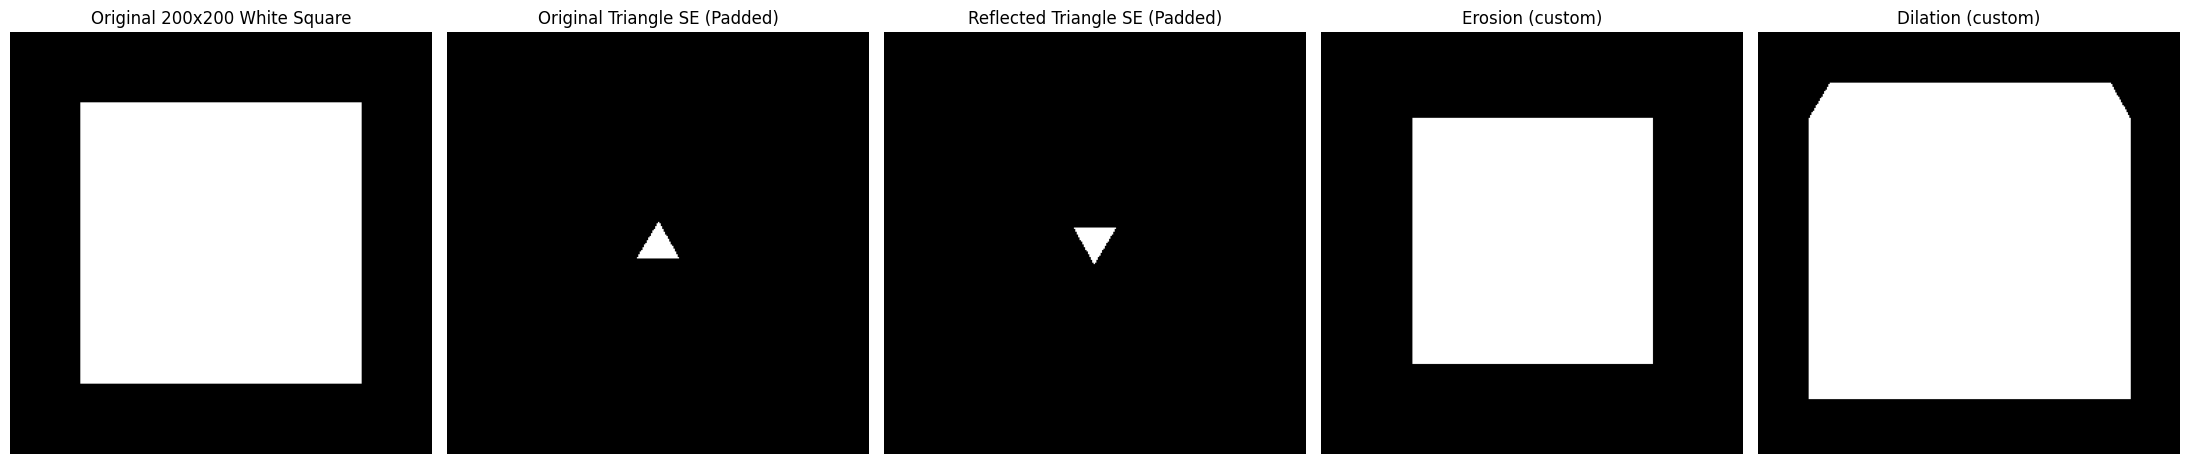

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
canvas_size = 300
square_size = 200
triangle_size = 30

# 建立影像（中央白色正方形）
image = np.zeros((canvas_size, canvas_size), dtype=np.uint8)
start = (canvas_size - square_size) // 2
end = start + square_size
image[start:end, start:end] = 255

# 建立正三角形 SE（原始大小）
se_canvas = np.zeros((triangle_size, triangle_size), dtype=np.uint8)
h = int(np.round(np.sqrt(3) / 2 * triangle_size))
pts = np.array([
    [triangle_size // 2, 0],        # 頂點(15, 0)
    [0, h - 1],                     # 左下角(0, 高)
    [triangle_size - 1, h - 1]      # 右下角(29, 高)
], np.int32)
cv2.fillConvexPoly(se_canvas, pts, 1)

# 反射 SE（左右上下翻轉）
se_reflected = np.flip(se_canvas)

# --- 自製 Dilation ---
def custom_dilation(img, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    output = np.zeros_like(img)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            region = padded[y:y+kh, x:x+kw]
            if np.any(region[kernel == 1]):
                output[y, x] = 255
    return output

# --- 自製 Erosion ---
def custom_erosion(img, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    output = np.zeros_like(img)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            region = padded[y:y+kh, x:x+kw]
            if np.all(region[kernel == 1] == 255):
                output[y, x] = 255
    return output

# 使用自製函式取代 cv2.erode / cv2.dilate
eroded_box = custom_erosion(image, se_reflected)
dilated_box = custom_dilation(image, se_reflected)

# Padding function
def pad_to_canvas(se, canvas_size):
    h, w = se.shape
    top = (canvas_size - h) // 2
    bottom = canvas_size - h - top
    left = (canvas_size - w) // 2
    right = canvas_size - w - left
    return np.pad(se * 255, ((top, bottom), (left, right)), mode='constant', constant_values=0)

# 使用 padding 補零將 SE 放入 canvas 尺寸
se_canvas_padded = pad_to_canvas(se_canvas, canvas_size)
se_reflected_padded = pad_to_canvas(se_reflected, canvas_size)

# 顯示圖像
fig, axs = plt.subplots(1, 5, figsize=(22, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original 200x200 White Square")

axs[1].imshow(se_canvas_padded, cmap='gray')
axs[1].set_title("Original Triangle SE (Padded)")

axs[2].imshow(se_reflected_padded, cmap='gray')
axs[2].set_title("Reflected Triangle SE (Padded)")

axs[3].imshow(eroded_box, cmap='gray')
axs[3].set_title("Erosion (custom)")

axs[4].imshow(dilated_box, cmap='gray')
axs[4].set_title("Dilation (custom)")

for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()